Importamos

In [1]:
# Importamos las librerías habituales
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pylab as plt #to plot graphics
import numpy as np # To handle with matrices
import seaborn as sns # to build modern graphics
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading and primarly analysis on DF

In [2]:
def load(path, info = True):
    
    import pandas as pd
    import io
    
    if len(path.split(".csv")) > 1:
        read = pd.read_csv(path)
    elif len(path.split(".xlsx")) > 1:
        read = pd.read_excel(path)
    
    if info:
        if len(read) > 0:
            print("# Data imported!")
            print("# ------------------------------------", "\n")
        
            print("# DIMENSIONS -------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")

            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("object").columns), "\n", 
                      read.select_dtypes("object").columns.tolist(), "\n")
    
            if len(read.select_dtypes("integer").columns) > 0:
                print("Integer Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("integer").columns), "\n", 
                      read.select_dtypes("integer").columns.tolist(), "\n")
    
            if len(read.select_dtypes("float").columns) > 0:
                print("Float Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("float").columns), "\n", 
                      read.select_dtypes("float").columns.tolist(), "\n")
    
            if len(read.select_dtypes("bool").columns) > 0:
                print("Bool Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("bool").columns), "\n", 
                      read.select_dtypes("bool").columns.tolist(), "\n")
    
            print("# MISSING VALUE ---------------------")
            print("Are there any missing values? \n ", np.where(read.isnull().values.any() == False, 
                                                            "No missing value!", "Data includes missing value!"), "\n")
            
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)
          
        else:
            print("# Data did not import!")
    
    return read

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def CalcOutliers(df_num): 
    '''
    
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return


In [3]:
reviews = load('/content/drive/MyDrive/Lab_datos/wines.csv',True)

# Data imported!
# ------------------------------------ 

# DIMENSIONS -------------------------
Observation: 129971 Column: 14 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 11 
 ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery'] 

Integer Variables: 
 # of Variables: 2 
 ['Unnamed: 0', 'points'] 

Float Variables: 
 # of Variables: 1 
 ['price'] 

# MISSING VALUE ---------------------
Are there any missing values? 
  Data includes missing value! 

# MEMORY USAGE ---------------------- 
 13.9+ MB


In [4]:
reviews = reviews.drop('Unnamed: 0', axis=1)

In [5]:
reviews.head()


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
reviews.describe(include=object)

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,425,1229,17,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,36247,4480,11065,25514,25514,11,13272,222


In [7]:
reviews.variety.value_counts()[0:10]

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

In [8]:
top_countries = reviews.country.value_counts()[0:10].index.tolist()
top_countries

['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany']

In [9]:
reviews.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
points,129971.0,88.447138,3.039730,80.0,82.0,84.0,85.0,86.0,88.0,91.0,92.0,93.0,95.0,100.0
price,120975.0,35.363389,41.022218,4.0,8.0,10.0,12.0,15.0,25.0,48.0,65.0,85.0,155.0,3300.0


In [10]:
(reviews.isna().sum() / reviews.shape[0]).sort_values(ascending = False)

region_2                 0.611367
designation              0.288257
taster_twitter_handle    0.240154
taster_name              0.201922
region_1                 0.163475
price                    0.069215
country                  0.000485
province                 0.000485
variety                  0.000008
description              0.000000
points                   0.000000
title                    0.000000
winery                   0.000000
dtype: float64

In [11]:
resumetable(reviews)

Dataset Shape: (129971, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,country,object,63,43,Italy,Portugal,US,2.77
1,description,object,0,119955,"Aromas include tropical fruit, broom, brimston...","This is ripe and fruity, a wine that is smooth...","Tart and snappy, the flavors of lime flesh and...",16.83
2,designation,object,37465,37979,Vulkà Bianco,Avidagos,NaN,13.83
3,points,int64,0,21,87,87,87,3.64
4,price,float64,8996,390,NaN,15.0,14.0,5.77
5,province,object,63,425,Sicily & Sardinia,Douro,Oregon,5.05
6,region_1,object,21247,1229,Etna,NaN,Willamette Valley,7.89
7,region_2,object,79460,17,NaN,NaN,Willamette Valley,3.28
8,taster_name,object,26244,19,Kerin O’Keefe,Roger Voss,Paul Gregutt,3.39
9,taster_twitter_handle,object,31213,15,@kerinokeefe,@vossroger,@paulgwine,3.23


Analizando el atributo points

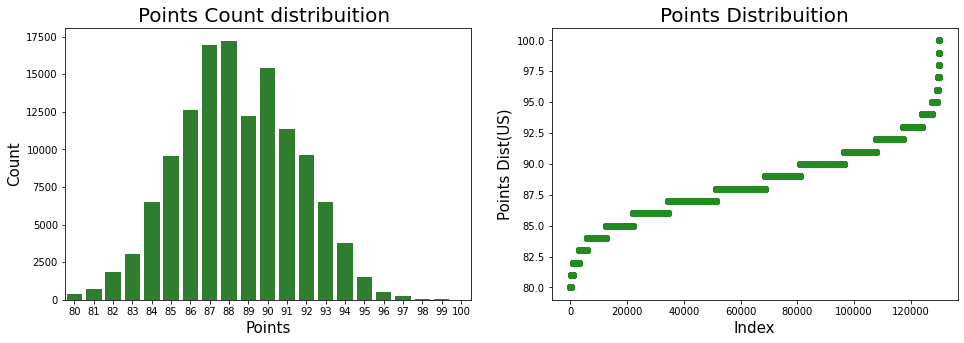

In [12]:
# define the size of figures that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=reviews, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(reviews.shape[0]), np.sort(reviews.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

#we can see that the points given follow a normal distribution

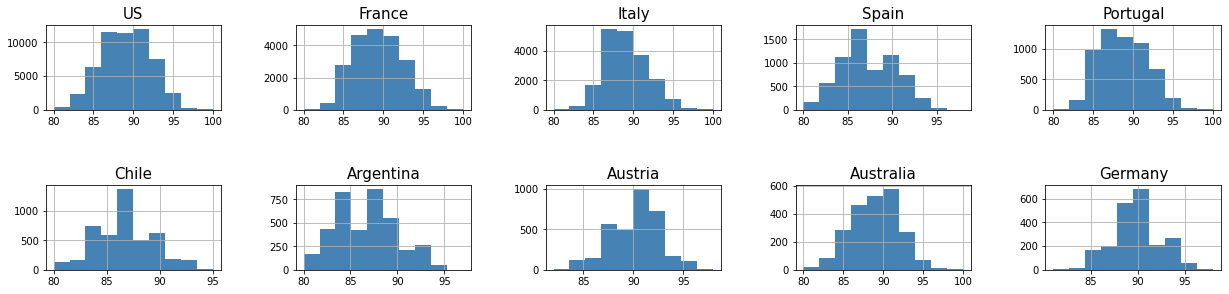

In [13]:
#voy a fijarme la distribución de puntos para los 10 países que más aparecen
fig, axes = plt.subplots(2, 5, figsize = (18,5))
i = 0
j = 0
for country in top_countries:
  if i == 5:
    i = 0
    j = j + 1
  reviews[(reviews.country == country)].hist("points", ax = axes[j][i], color = "steelblue")
  axes[j][i].set_title(country, fontsize = 15)
  i = i + 1
plt.tight_layout(pad = 4);


In [14]:
# we set wines into categories
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

reviews["rating_cat"] = reviews["points"].apply(cat_points)

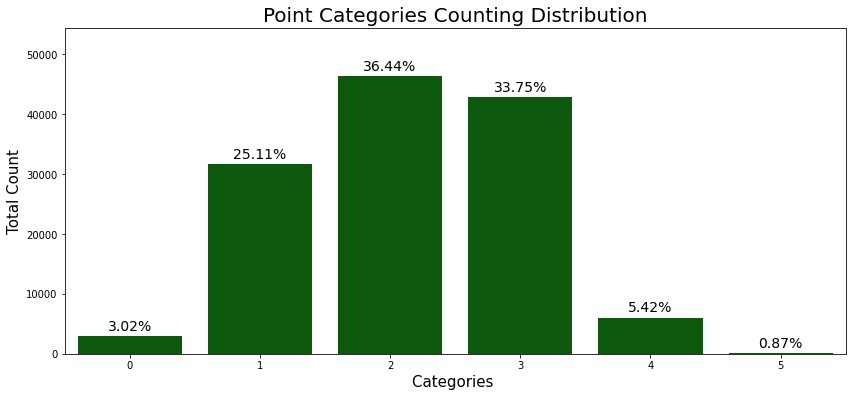

In [15]:
total = len(reviews)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=reviews)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

# for setting the text
for p in g.patches:
    height = p.get_height() + 1000
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

In [16]:
CalcOutliers(reviews['points'])

Identified lowest outliers: 0
Identified upper outliers: 129
Identified outliers: 129
Non-outlier observations: 129842
Total percentual of Outliers:  0.0994


Analizando el atributo price

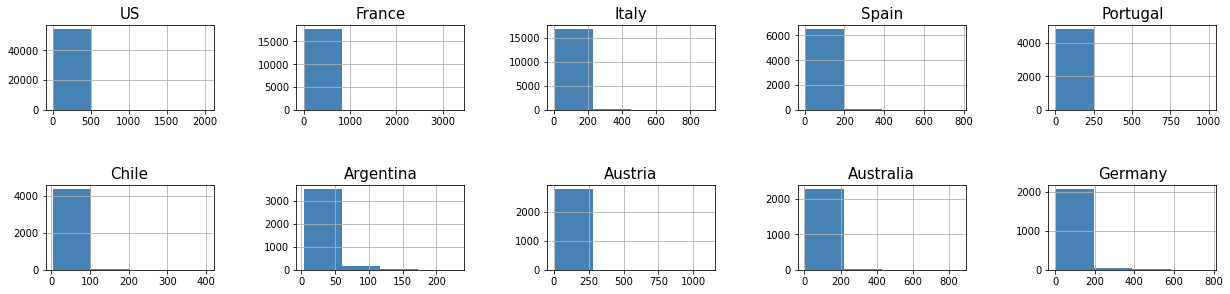

In [17]:
#voy a fijarme la distribución de puntos para los 10 países que más aparecen
fig, axes = plt.subplots(2, 5, figsize = (18,5))
i = 0
j = 0
for country in top_countries:
  if i == 5:
    i = 0
    j = j + 1
  reviews[(reviews.country == country)].hist("price", ax = axes[j][i], color = "steelblue",bins=4)
  axes[j][i].set_title(country, fontsize = 15)
  i = i + 1
plt.tight_layout(pad = 4);
# we can see that Argentina has the cheapest wines and France the most expensive ones.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


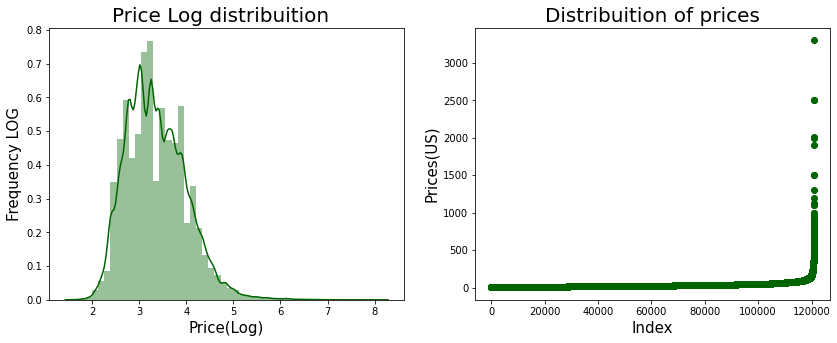

In [18]:
plt.figure(figsize=(14,5))
#uso escala logaritma porque hay una gran diferencia entre los valores de los datos
g1 = plt.subplot(121)
g1 = sns.distplot(np.log(reviews['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(reviews.shape[0]), np.sort(reviews.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

#se puede observar que la mayoría de los vinos tienen un precio menor a 500

In [19]:
CalcOutliers(reviews['price'])

Identified lowest outliers: 0
Identified upper outliers: 1177
Identified outliers: 1177
Non-outlier observations: 119798
Total percentual of Outliers:  0.9825


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


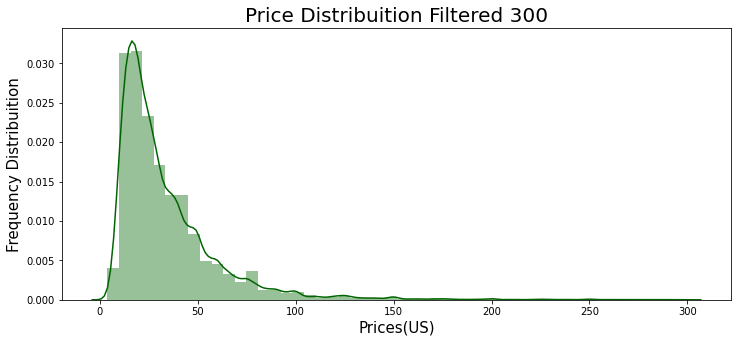

In [20]:
#filterd distribution of prices
plt.figure(figsize=(12,5))

g = sns.distplot(reviews[reviews['price'] < 300]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

In [21]:
# Let's get tehe price_log to better work with this feature
reviews['price_log'] = np.log(reviews['price'])

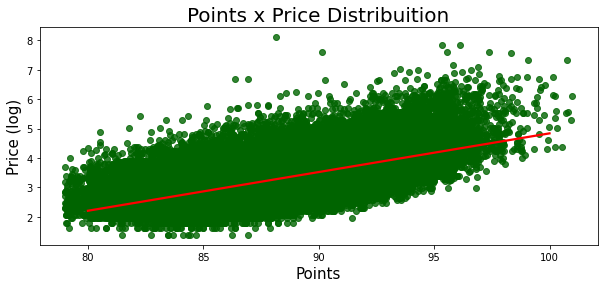

In [22]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=reviews, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

#se puede observar que la relacion precio calidad no es lineal. 

Country distribution

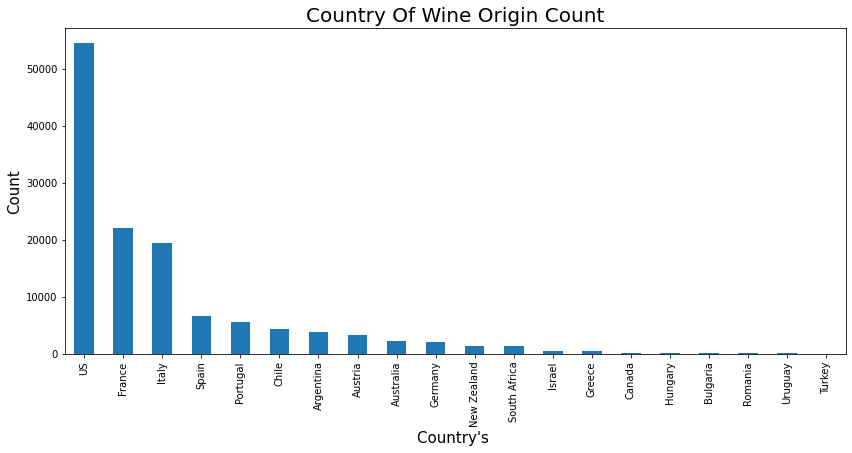

In [23]:
plt.figure(figsize=(14,6))


reviews['country'].value_counts()[:20].plot(kind="bar")

plt.title("Country Of Wine Origin Count", fontsize=20)
plt.xlabel("Country's ", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.show()

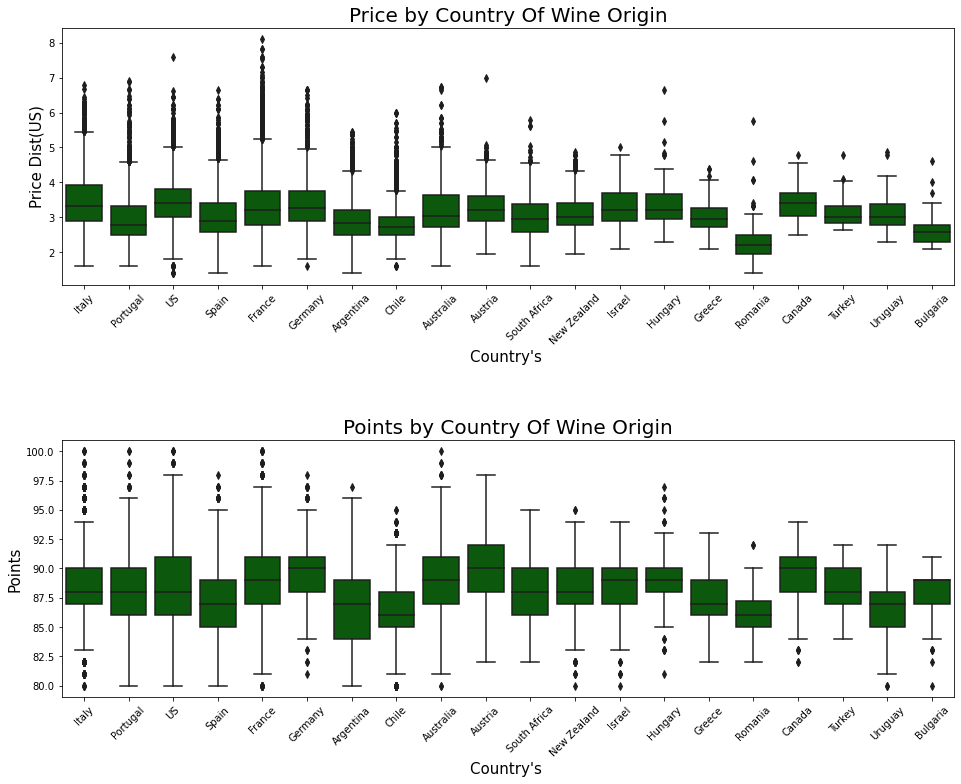

In [24]:
plt.figure(figsize=(16,12))

country = reviews.country.value_counts()[:20]

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=reviews.loc[(reviews.country.isin(country.index.values))],
                 color='darkgreen')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=reviews[reviews.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

Taster feature

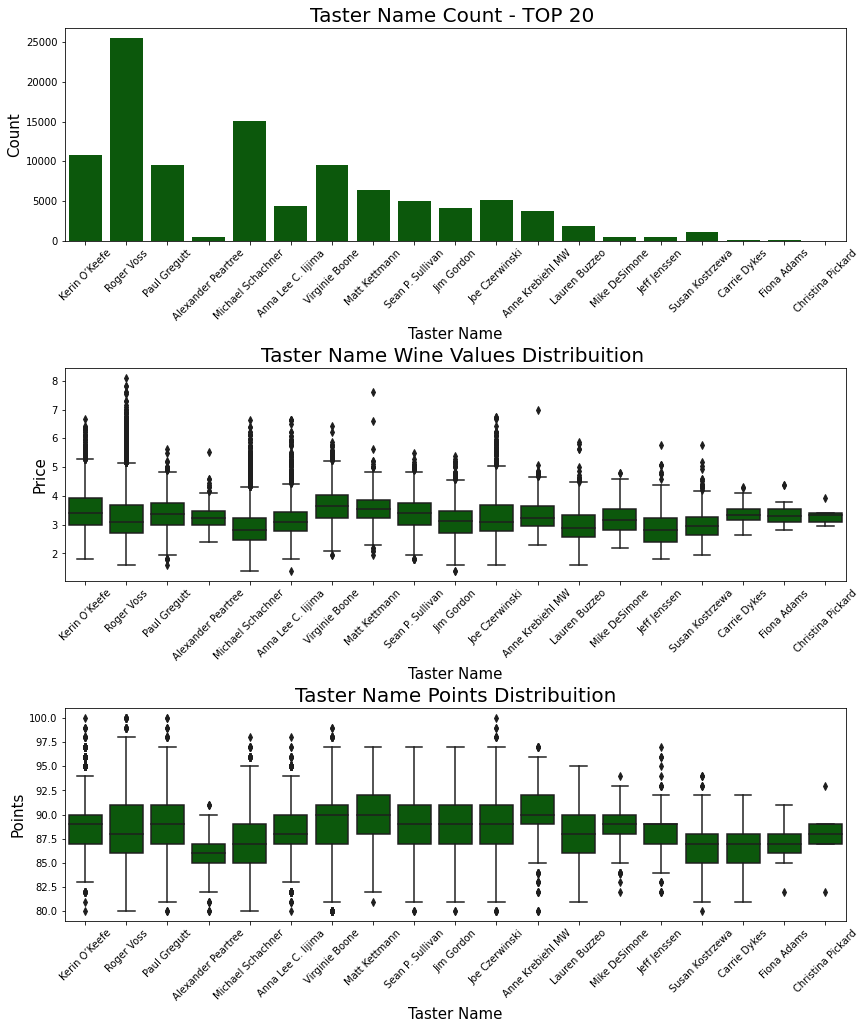

In [25]:
plt.figure(figsize=(14,16))

provinces = reviews['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='taster_name', data=reviews, color='darkgreen')
g.set_title("Taster Name Count - TOP 20 ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='taster_name', data=reviews, 
                 color='darkgreen')
g1.set_title("Taster Name Wine Values Distribuition ", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='taster_name',
                  data=reviews, color='darkgreen')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

# we can see that Alexander is the strictest one

Variety distribution

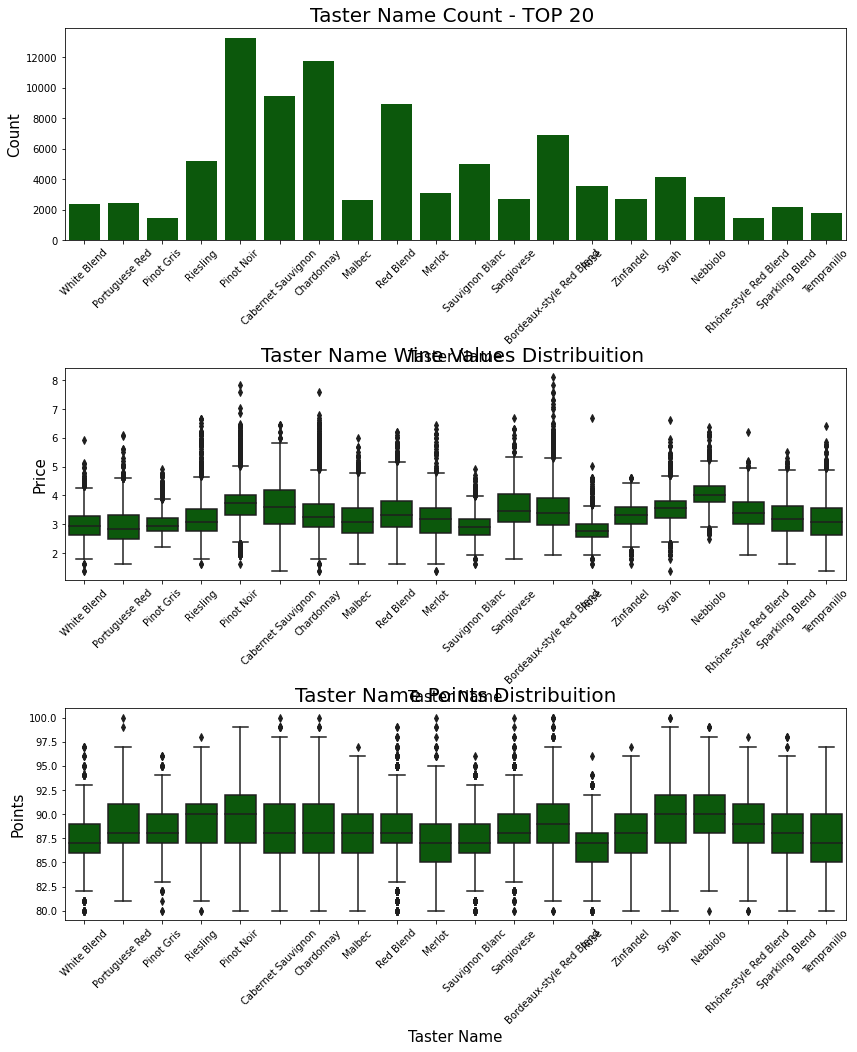

In [31]:
plt.figure(figsize=(14,16))

variety = reviews['variety'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=reviews.loc[(reviews.variety.isin(variety.index.values))], 
                  color='darkgreen')
g.set_title("Taster Name Count - TOP 20 ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='variety', data=reviews.loc[(reviews.variety.isin(variety.index.values))], 
                 color='darkgreen')
g1.set_title("Taster Name Wine Values Distribuition ", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=reviews.loc[(reviews.variety.isin(variety.index.values))], color='darkgreen')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

# we can see that Alexander is the strictest one

Winery

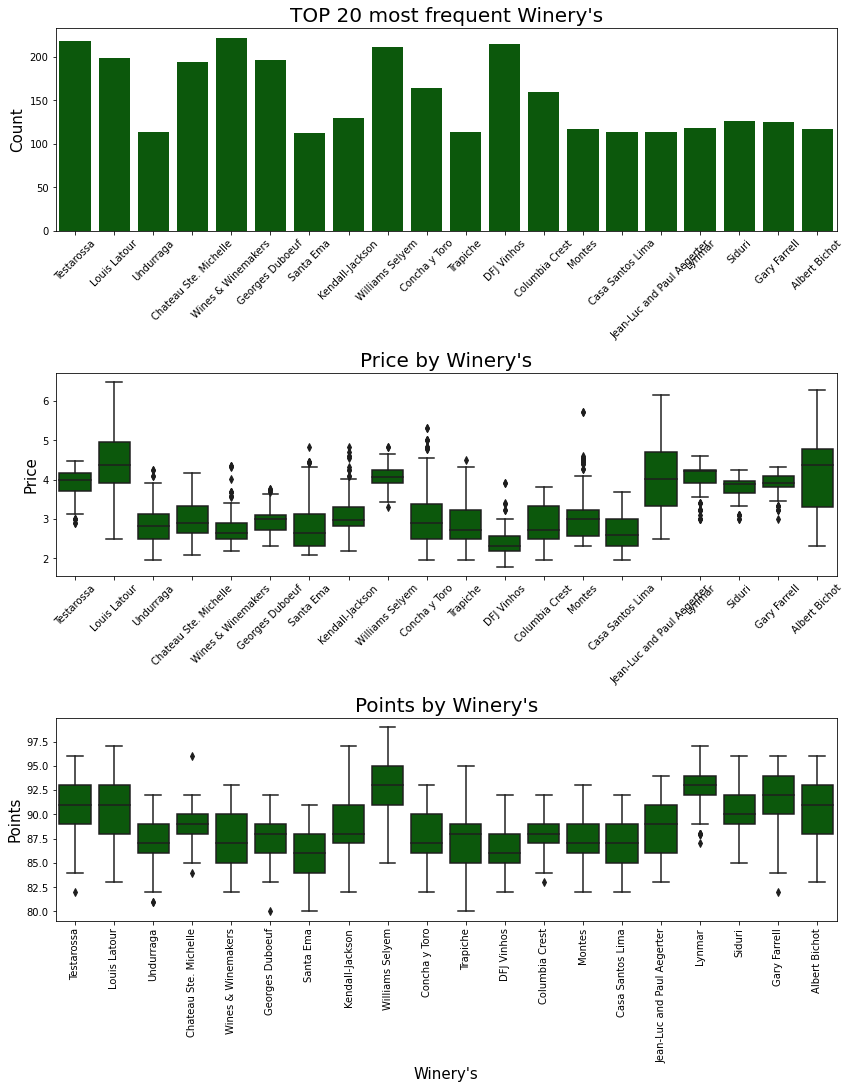

In [28]:
plt.figure(figsize=(14,16))

winery = reviews.winery.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='winery', 
                  data=reviews.loc[(reviews.winery.isin(winery.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 most frequent Winery's", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='winery',
                  data=reviews.loc[(reviews.winery.isin(winery.index.values))],
                 color='darkgreen')
g1.set_title("Price by Winery's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='winery',
                  data=reviews.loc[(reviews.winery.isin(winery.index.values))],
                 color='darkgreen')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

Text mining on descriptions

In [35]:
reviews['desc_length'] = reviews.description.apply(lambda x: len(x))

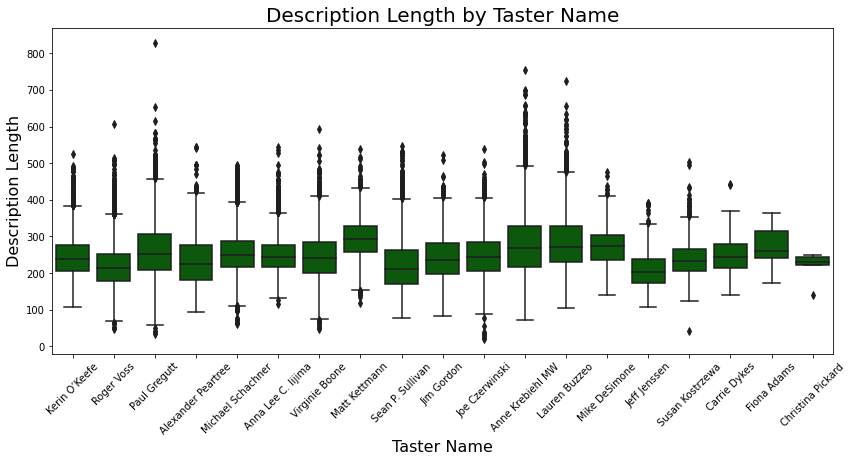

In [36]:
plt.figure(figsize=(14,6))

g = sns.boxplot(x='taster_name', y='desc_length', 
                data=reviews, color='darkgreen')
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Taster Name', fontsize = 16) # X label
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

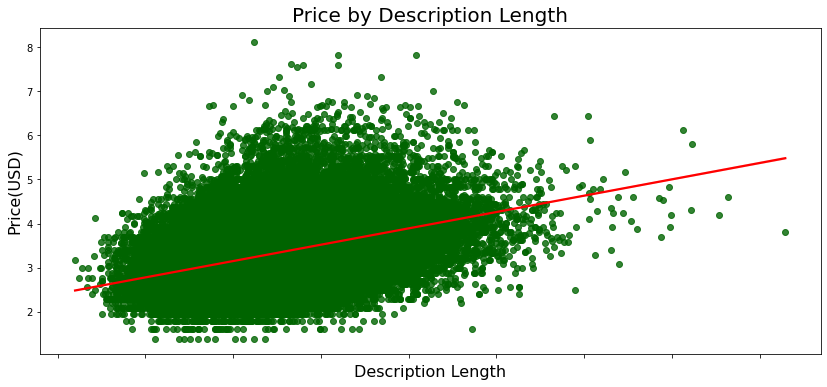

In [37]:
plt.figure(figsize=(14,6))

g = sns.regplot(x='desc_length', y='price_log', line_kws={'color':'red'},
                data=reviews, fit_reg=True, color='darkgreen', )
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

Text processing

In [45]:
df_descriptions = reviews.groupby(['taster_name'])['description'].apply(lambda x: ','.join(x)).reset_index()

In [46]:
df_descriptions

,taster_name,description
0,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ..."
1,Anna Lee C. Iijima,Savory dried thyme notes accent sunnier flavor...
2,Anne Krebiehl MW,"Freshness characterizes the nose: green pear, ..."
3,Carrie Dykes,"Popping with aromas of lychee, rose, geranium ..."
4,Christina Pickard,A blend of Shiraz from Eden Valley and the val...
5,Fiona Adams,Intense yeasty aromas lean a bit nutty with a ...
6,Jeff Jenssen,From a vineyard in Northern Tokaj this dry Fur...
7,Jim Gordon,"Very deep in color and spicy-smoky in flavor, ..."
8,Joe Czerwinski,This medium-bodied Chardonnay features aromas ...
9,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston..."


In [50]:
import regex as re
import string   # libreria de cadena de caracteres
def clean_text(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()                                              
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)                           
    # reemplaza singnos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) 
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text) 
    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)                             
    return text

# Defino una funcion anonima que al pasarle un argumento devuelve el resultado de aplicarle la funcion anterior a este mismo argumento


# Dataframe que resulta de aplicarle a las columnas la funcion de limpieza
df_descriptions['description'] = df_descriptions.description.apply(lambda x: clean_text(x))

In [51]:
df_descriptions

,taster_name,description
0,Alexander Peartree,pineapple rind lemon pith and orange blossom ...
1,Anna Lee C. Iijima,savory dried thyme notes accent sunnier flavor...
2,Anne Krebiehl MW,freshness characterizes the nose green pear ...
3,Carrie Dykes,popping with aromas of lychee rose geranium ...
4,Christina Pickard,a blend of shiraz from eden valley and the val...
5,Fiona Adams,intense yeasty aromas lean a bit nutty with a ...
6,Jeff Jenssen,from a vineyard in northern tokaj this dry fur...
7,Jim Gordon,very deep in color and spicy smoky in flavor ...
8,Joe Czerwinski,this medium bodied chardonnay features aromas ...
9,Kerin O’Keefe,aromas include tropical fruit broom brimston...


In [53]:
# Vamos a crear la matriz de documentos-terminos usando usando CountVectorizer, y excluiremos las stop words del espaniol
from sklearn.feature_extraction.text import CountVectorizer

# Cargamos del paquete nltk las stopwords del espaniol a la lista "lines"
import nltk
nltk.download('stopwords') # hay que descargar este modulo en particular

lines = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [60]:
# Ahora voy a crear la matriz de términos/documentos
# Inicializo el modelo excluyendo stopwords
cv = CountVectorizer(stop_words=lines)
# Ajustamos el modelo y lo aplicamos al texto de nuestro dataframe generando una matriz esparsa
data_cv = cv.fit_transform(df_descriptions.description)
# Nos creamos un dataframe transformando a densa la matriz generada recien que tiene como columnas las palabras (terminos) y como filas los documentos
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# Le asignamos los indices del dataframe anterior
data_dtm.index = df_descriptions.taster_name

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
data_dtm

,aa,aacacia,aand,aaron,ab,abacela,abadal,abadia,abandon,abandoned,...,émilion,étoile,été,öküzgözü,über,überaromatic,überbest,ürzig,ürziger,žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anna Lee C. Iijima,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,0,0,0,2,0
Anne Krebiehl MW,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
Carrie Dykes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Christina Pickard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fiona Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jeff Jenssen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Jim Gordon,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Joe Czerwinski,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [62]:
import pickle
# Guardamos en formato pickle los dataframes
data_dtm.to_pickle('/content/drive/MyDrive/Lab_datos/Wines/dtm.pkl')
df_descriptions.to_pickle('/content/drive/MyDrive/Lab_datos/Wines/data_clean.pkl')
# Guardamos tambien el objeto CountVectorize
pickle.dump(cv, open("/content/drive/MyDrive/Lab_datos/Wines/cv.pkl", "wb"))

In [63]:
data = pd.read_pickle('/content/drive/MyDrive/Lab_datos/Wines/dtm.pkl')

# Transponemos para tener una matriz de terminosXdocumentos
data = data.transpose()

data.head()

taster_name,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
aa,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
aacacia,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
aand,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,7
ab,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
#Palabras más usadas por autor
# Creo un diccionario
top_dict = {}

# Por cada autor
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) # Ordeno las filas en forma decreciente y me quedo con las 30 palabras mas usadas
    top_dict[c]= list(zip(top.index, top.values))       # le asigno el autor a la key del diccionario y como valor una tupla con la palabra y su frecuencia

print(top_dict)
print("\n")

# Imprimo las 15 palabras mas frecuentes por año
for author, top_words in top_dict.items():
    print(author) # imprimo la key
    print(', '.join([word for word, count in top_words[0:14]])) # imprimo las palabras en orden decreciente segun frecuencia y separadas con espacio y coma

{'Alexander Peartree': [('palate', 379), ('nose', 254), ('aromas', 172), ('red', 165), ('finish', 146), ('notes', 128), ('bodied', 127), ('flavors', 116), ('medium', 113), ('fruit', 111), ('tannins', 107), ('cherry', 101), ('peach', 99), ('wine', 92), ('acidity', 91), ('lemon', 91), ('tones', 89), ('light', 81), ('black', 77), ('shows', 75), ('currant', 74), ('dark', 70), ('citrus', 65), ('oak', 65), ('juicy', 65), ('cabernet', 60), ('vanilla', 59), ('blend', 58), ('tart', 57), ('berries', 54)], 'Anna Lee C. Iijima': [('flavors', 2307), ('palate', 2267), ('acidity', 2144), ('finish', 2128), ('dry', 1718), ('notes', 1516), ('riesling', 1385), ('wine', 1241), ('lemon', 1219), ('fresh', 1194), ('lime', 1088), ('cherry', 1021), ('peach', 984), ('ripe', 979), ('apple', 960), ('sweet', 938), ('yet', 885), ('nose', 864), ('fruit', 849), ('long', 796), ('mineral', 741), ('brisk', 732), ('concentrated', 728), ('drink', 718), ('bodied', 713), ('tangerine', 707), ('style', 694), ('tannins', 691),

Word cloud

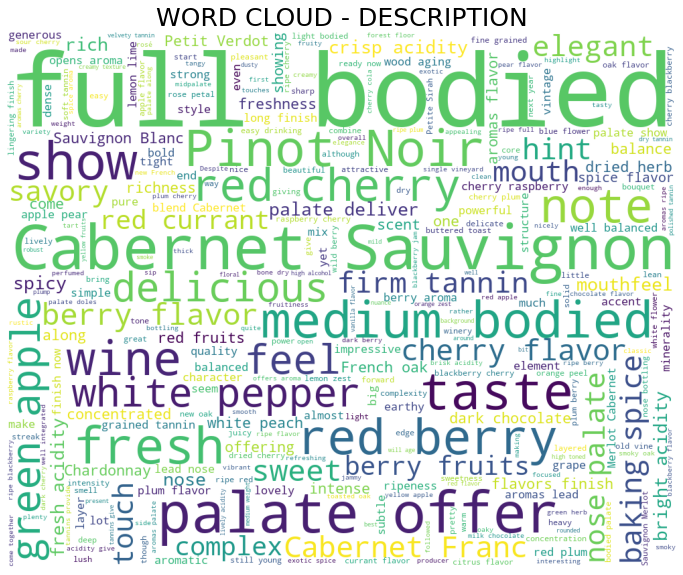

In [38]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(reviews['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

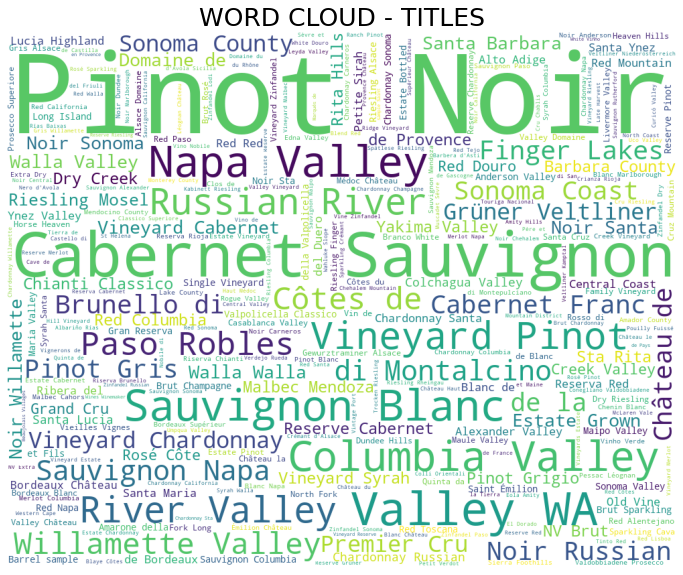

In [40]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(reviews['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

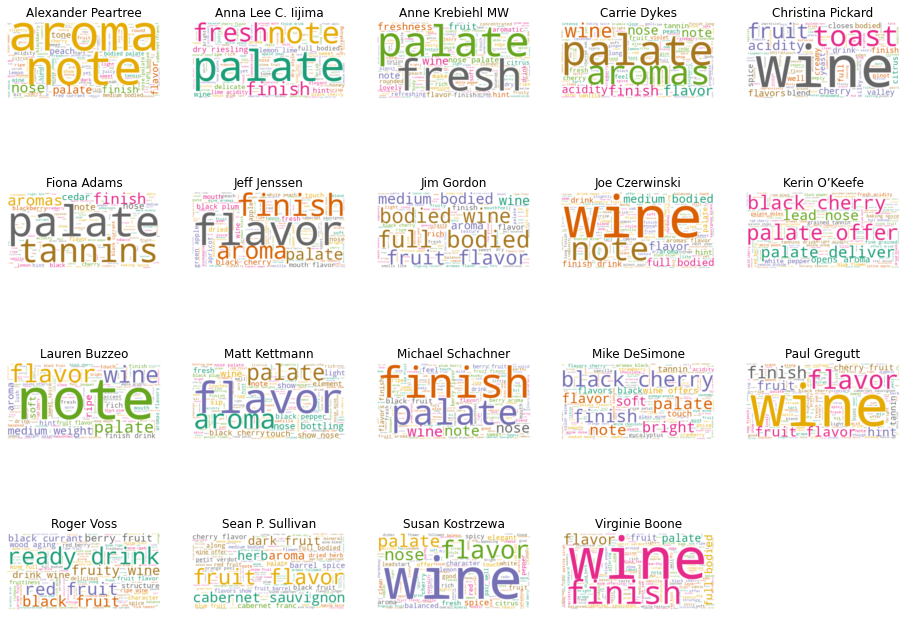

In [72]:
from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords
wc = WordCloud(stopwords=lines, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
plt.rcParams['figure.figsize'] = [16,12] # tamanio de los plots
df_descriptions.index = df_descriptions.taster_name
# Para cada anio creo un WC
for index, author in enumerate(data.columns):
    wc.generate(df_descriptions.description[author])  # aca le pido que genere los WC a partir del texto de cada anio
    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")  
    plt.axis("off")
    plt.title(author)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,7*4))
country = reviews.country.value_counts()[:20]
for n, cat in enumerate(country.index[:10]):
    
    ax = plt.subplot(grid[n])   
    # print(f'PRINCIPAL WORDS CATEGORY: {cat}')
    # vectorizer = CountVectorizer(ngram_range = (3,3)) 
    # X1 = vectorizer.fit_transform(df_train[df_train['host_cat'] == cat]['answer'])  
    # print(cat)
    # Applying TFIDF 
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5, 
                                 stop_words='english',
                                 max_df=.5) 
    
    X2 = vectorizer.fit_transform(reviews.loc[(reviews.country == cat)]['description']) 
    features = (vectorizer.get_feature_names_out()) 
    scores = (X2.toarray()) 
    
    # Getting top ranking features 
    sums = X2.sum(axis = 0) 
    data1 = [] 
    
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 

    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False))[:15]
    
    sns.barplot(x='term', y='rank', data=words, ax=ax, 
                color='blue', orient='v')
    ax.set_title(f"Wine's from {cat} N-grams", fontsize=19)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(" ")

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)

plt.show()

Recommendation system

In [5]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction

In [6]:
col = ['province','variety','points']

wine1 = reviews[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot.head()
wine_pivot_matrix = csr_matrix(wine_pivot)
wine_pivot.head()

province,Achaia,Aconcagua Costa,Aconcagua Valley,Aegean,Agioritikos,Ahr,Alenquer,Alentejano,Alentejo,Alenteo,...,Wellington,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa
variety,,,,,,,,,,,,,,,,,,,,,
Abouriou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agiorgitiko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aglianico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albanello,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [15]:
for n in range(5):
    query_index = np.random.choice(wine_pivot.shape[0])
    #necesito los indices de los 6 vecinos más cercanos
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')

Recommendation for ## White Port ##:
1: Muscadine with distance: 0.26947306067507326
2: Roussanne-Grenache Blanc with distance: 0.26947306067507326
3: Carignane with distance: 0.26947306067507326
4: Pinot Blanc-Viognier with distance: 0.26947306067507326
5: Malbec-Syrah with distance: 0.26947306067507326


Recommendation for ## Tinta Miúda ##:
1: Alvarinho-Chardonnay with distance: 6.45598632003086e-05
2: Jampal with distance: 0.28490408395699707
3: Vital with distance: 0.28490408395699707
4: Moscatel Graúdo with distance: 0.30097365510403085
5: Fernão Pires with distance: 0.36496679829386736


Recommendation for ## Petite Sirah ##:
1: Zinfandel with distance: 0.4501070174544318
2: White Riesling with distance: 0.45042375821445224
3: Viognier-Marsanne with distance: 0.5210874002961126
4: Mourvèdre-Syrah with distance: 0.5212117675224895
5: Muscat Canelli with distance: 0.5322844025826166


Recommendation for ## Turbiana ##:
1: Trebbiano di Lugana with distance: 0.0
2: Nebbiolo with dis